In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'data_variables_objetivo.csv'

# Importar el CSV y usar 'date_index' como índice
df_final = pd.read_csv(filename, index_col='date_index', parse_dates=True)
col = 'au_recuperacion'
# Mostrar el DataFrame
df_final

C:\Users\Cris2\AppData\Local\Temp\ipykernel_5316\529603038.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_final = pd.read_csv(filename, index_col='date_index', parse_dates=True)


,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,...,pb_contenido,zn_contenido,ag_concentrado_pb_ley,pb_concentrado_pb_ley,zn_concentrado_pb_ley,ag_concentrado_zn_ley,zn_concentrado_zn_ley,au_concentrado_fe_ley,ag_concentrado_fe_ley,fe_concentrado_fe_ley
date_index,,,,,,,,,,,,,,,,,,,,,
2024-01-02_1,12.0,2042.20,0.991981,395.810002,0.806986,0.656214,5.784357,0.027701,23.439805,14143.800961,...,13.924589,46.362309,14143.800961,29.299741,10.118122,1189.957338,52.561161,2.496992,640.014986,34.256666
2024-01-02_2,12.0,2042.20,1.088931,350.599999,0.779781,1.942134,5.381652,0.035221,31.055118,13517.780309,...,11.891555,28.326183,13517.780309,33.099183,8.520401,919.398482,43.465123,2.338633,639.049666,34.827484
2024-01-03_1,12.0,1955.00,1.294525,386.740000,1.170457,1.901957,6.033765,0.038873,29.936189,11565.332135,...,20.536926,28.996267,11565.332135,38.355623,9.486405,943.354408,49.413741,2.371649,639.476068,34.757763
2024-01-03_2,12.0,2068.40,1.320697,308.410002,1.032803,1.801547,5.784384,0.031786,37.388892,10725.032307,...,19.144081,29.539510,10725.032307,38.863268,10.561065,750.772639,50.077870,2.264858,639.625521,34.573644
2024-01-04_1,12.0,1857.10,1.378503,286.739996,1.032243,2.139257,5.631025,0.042235,37.887393,9050.180473,...,17.239580,32.335838,9050.180473,38.046329,10.878103,852.150337,43.373812,2.296030,639.566745,34.677839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-29_2,12.0,2017.94,0.865605,376.688699,1.791817,3.490793,6.982235,0.069270,15.269189,8647.058484,...,28.242087,52.123218,8647.058484,39.966413,12.680006,459.733611,52.290176,2.059943,416.526665,33.502127
2025-03-30_1,12.0,2042.20,1.077932,431.114568,2.176334,3.899073,7.905719,0.048294,15.368160,7117.069787,...,38.823788,52.241656,7117.069787,38.254328,10.480111,454.182948,52.602052,1.609525,470.219341,32.986070
2025-03-30_2,12.0,2042.20,1.050544,372.369027,1.903411,3.224023,7.263569,0.063374,15.352869,6147.698548,...,33.627777,47.229481,6147.698548,37.666006,13.342212,584.498475,46.818174,1.554242,473.131417,29.799700


In [44]:
y = df_final[col]

In [46]:
def train_val_test_split(df, tr_size=0.8, vl_size=0.1, ts_size=0.1):
    #Definimos el numero de datos en cada subserie
    N = df.shape[0]
    Ntrain = int(tr_size*N)
    Nval = int(vl_size*N)
    Ntst = N - Ntrain - Nval

    # Realizar particion
    train = df[0:Ntrain]
    val = df[Ntrain:Ntrain+Nval]
    test = df[Ntrain+Nval:]

    return train, val, test

In [48]:
tr, vl, ts = train_val_test_split(y)
print(f"tam set de entrenamiento: {tr.shape}")
print(f"tam set de validacion: {vl.shape}")
print(f"tam set de test: {ts.shape}")

tam set de entrenamiento: (665,)
tam set de validacion: (83,)
tam set de test: (84,)


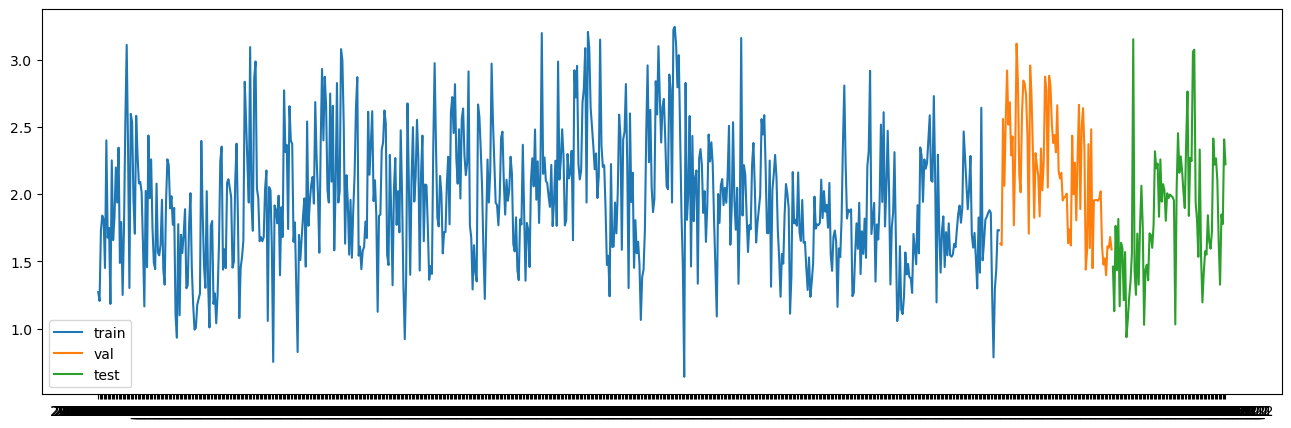

In [14]:
# Subsets 
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr, label='train')
ax.plot(vl, label='val')
ax.plot(ts, label='test')
plt.legend()

In [50]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado 
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))
    
    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [52]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 4  # Hiperparámetro
OUTPUT_LENGTH = 2    # Modelo multi-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (659, 4, 1), y_tr: (659, 2, 1)
Set de validación - x_vl: (77, 4, 1), y_vl: (77, 2, 1)
Set de prueba - x_ts: (78, 4, 1), y_ts: (78, 2, 1)


In [54]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir

    
    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    # *** Implementación adicional: determinar el índice de la columna
    # que contiene la variable a predecir
    #col_ref = df.columns.get_loc(col_ref)

    # Número de instantes de tiempo de entrada y de covariables
    NSAMPLES = data_input['x_tr'].shape[1]
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])
    
    # Escalamiento Ys (teniendo en cuenta "col_ind")
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [56]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar (especificando la columna con la variable a predecir)
data_s, scaler = escalar_dataset(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

x_tr_s.shape


(659, 4, 1)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Configurar reproducibilidad
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# Hiperparámetros
N_UNITS = 8               # Tamaño de las capas LSTM
DROPOUT_RATE = 0.3        # Regularización
LEARNING_RATE = 0.001
BATCH_SIZE = 4
EPOCHS = 200
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # (time_steps, n_features)

# Función de pérdida personalizada: RMSE
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Optimizador con decay
optimizador = Adam(
    learning_rate=LEARNING_RATE,
    beta_1=0.9,
    beta_2=0.999,
    decay=1e-6
)

# Callback de detención temprana
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Arquitectura
modelo = Sequential([
    # Primera capa LSTM
    LSTM(
        N_UNITS,
        return_sequences=True,
        input_shape=INPUT_SHAPE,
        kernel_regularizer=tf.keras.regularizers.l2(1e-4)
    ),
    LayerNormalization(),
    Dropout(DROPOUT_RATE),

    # Segunda capa LSTM
    LSTM(
        N_UNITS,
        return_sequences=False,
        kernel_regularizer=tf.keras.regularizers.l2(1e-4)
    ),
    LayerNormalization(),
    Dropout(DROPOUT_RATE),

    # Capa de salida multistep
    Dense(
        OUTPUT_LENGTH,
        activation='linear',
        kernel_regularizer=tf.keras.regularizers.l2(1e-4)
    )
])

# Compilación
modelo.compile(
    optimizer=optimizador,
    loss=root_mean_squared_error,
    metrics=['mae']
)

# Entrenamiento
historia = modelo.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200


D:\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.8082 - mae: 0.6539 - val_loss: 0.2632 - val_mae: 0.2196
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5043 - mae: 0.4106 - val_loss: 0.2480 - val_mae: 0.2107
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4223 - mae: 0.3470 - val_loss: 0.2463 - val_mae: 0.2086
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3796 - mae: 0.3172 - val_loss: 0.2498 - val_mae: 0.2117
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3634 - mae: 0.3032 - val_loss: 0.2428 - val_mae: 0.2057
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3502 - mae: 0.2886 - val_loss: 0.2441 - val_mae: 0.2065
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3450 - mae: 0.2853 - val_loss: 0.2428 - val_mae: 0.2057
Epoch 8/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3516 - mae: 0.2920 - val_loss: 0.2503 - val_mae: 0.2108
Epoch 9/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss:

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Configurar reproducibilidad
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# Hiperparámetros ajustados para pocos datos
N_UNITS = 8 # Reducir capacidad para evitar overfitting
DROPOUT_RATE = 0.3  # Regularización
LEARNING_RATE = 0.001  # Tasa de aprendizaje más baja
BATCH_SIZE = 4  # Batch pequeño para mejor generalización
EPOCHS = 200
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # (time_steps, n_features)

# Arquitectura
modelo = Sequential([
    # Capa LSTM con regularización
    LSTM(
        N_UNITS, 
        input_shape=INPUT_SHAPE,
        kernel_regularizer=tf.keras.regularizers.l2(1e-4),
        return_sequences=False  # Solo última salida
    ),
    LayerNormalization(),  # Estabiliza entrenamiento
    Dropout(DROPOUT_RATE),
    
    # Capa de salida
    Dense(OUTPUT_LENGTH, activation='linear')
])

# Función de pérdida
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Optimizador con decaimiento de tasa de aprendizaje
optimizador = Adam(
    learning_rate=LEARNING_RATE, 
    beta_1=0.9, 
    beta_2=0.999, 
    decay=1e-6
)

# Early Stopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Compilación
modelo.compile(
    optimizer=optimizador,
    loss=root_mean_squared_error
)

# Entrenamiento con aumento de datos en tiempo real
historia = modelo.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200


D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
D:\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7087 - val_loss: 0.2979
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4957 - val_loss: 0.2715
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4227 - val_loss: 0.2609
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3778 - val_loss: 0.2490
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3643 - val_loss: 0.2492
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3562 - val_loss: 0.2494
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3489 - val_loss: 0.2498
Epoch 8/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3456 - val_loss: 0.2493
Epoch 9/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3467 - val_loss: 0.2510
Epoch 10/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3453 - val_loss: 0.2446
Epoch 11/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3419 - val_loss: 0.2491
Epoch 12/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

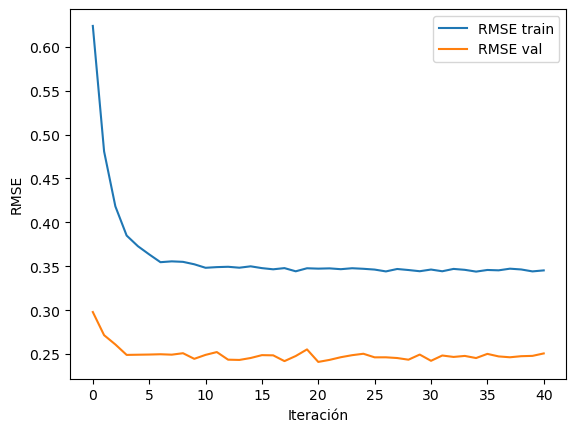

In [62]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

In [64]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.351
  RMSE val:	 0.255
  RMSE test:	 0.309


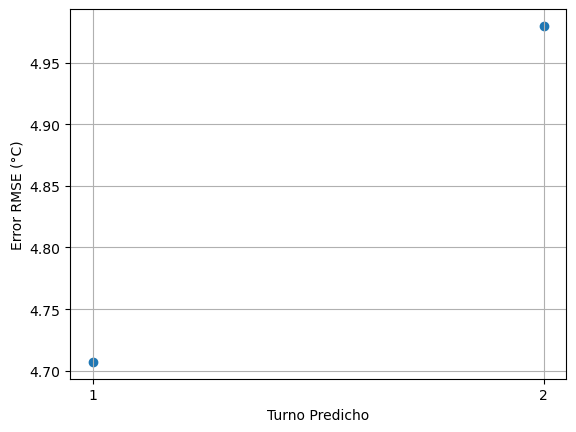

In [66]:
# 1. Generar las predicciones sobre el set de prueba
y_ts_pred_s = modelo.predict(x_ts_s, verbose=0)

# 2. Realizar la transformación inversa de las predicciones para llevar sus
# valores a la escala original
y_ts_pred = scaler.inverse_transform(y_ts_pred_s)

# 3. Calcular RMSE para cada instante de tiempo predicho
diff_cuad = np.square(y_ts.squeeze()-y_ts_pred) # 4995x4
proms = np.mean(diff_cuad, axis=0) # 1x4
rmse = np.sqrt(proms) # 1x4

# Graficar rmse para cada timestep
t = np.arange(1, len(rmse)+1)

fig, ax = plt.subplots()
ax.scatter(t, rmse)
ax.set_xlabel('Turno Predicho')
ax.set_ylabel('Error RMSE (°C)')
plt.xticks(ticks=t, labels=t)
plt.grid();

In [68]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)
    
    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)
    print(y_pred)
    return y_pred

In [70]:
x_ts_s.shape

(78, 4, 1)

In [72]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

[[75.38223  75.18892 ]
 [74.68076  74.79472 ]
 [73.31002  73.83263 ]
 [74.23656  74.3322  ]
 [75.01596  74.78864 ]
 [74.9778   74.877495]
 [78.31417  77.27314 ]
 [77.2269   76.880775]
 [73.96466  74.534615]
 [74.03513  74.44831 ]
 [75.51683  75.129875]
 [74.49297  74.57786 ]
 [79.27318  77.95969 ]
 [77.23506  77.23531 ]
 [75.042534 75.51554 ]
 [78.9296   78.080574]
 [77.34669  77.079445]
 [76.42646  76.4441  ]
 [77.11601  76.84747 ]
 [77.1653   76.584496]
 [74.21093  74.62744 ]
 [74.979004 75.052734]
 [75.618675 75.36941 ]
 [75.05241  74.98464 ]
 [75.99863  75.71359 ]
 [77.567795 76.793625]
 [77.27121  76.76589 ]
 [77.803    77.20904 ]
 [79.04411  78.08899 ]
 [75.46967  75.828316]
 [74.630684 75.0212  ]
 [74.334915 74.59251 ]
 [76.08542  75.46533 ]
 [74.47231  74.68881 ]
 [74.49918  74.67605 ]
 [75.79703  75.49666 ]
 [77.61992  76.68012 ]
 [77.358055 76.86706 ]
 [78.55092  77.744446]
 [77.7634   77.36025 ]
 [77.16261  76.83881 ]
 [76.820465 76.55173 ]
 [75.728516 75.65365 ]
 [73.00465 

In [74]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

ValueError: operands could not be broadcast together with shapes (156,) (78,2) 

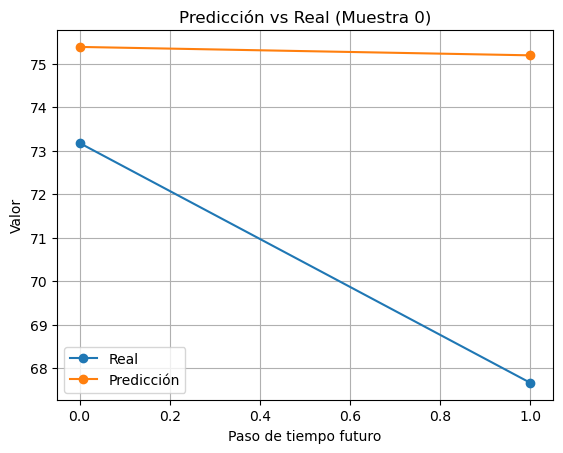

In [76]:
import matplotlib.pyplot as plt
import numpy as np

i = 0  # muestra que quieres graficar
plt.plot(y_ts[i], label='Real', marker='o')
plt.plot(y_ts_pred[i], label='Predicción', marker='o')
plt.title(f'Predicción vs Real (Muestra {i})')
plt.xlabel('Paso de tiempo futuro')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()